#Loading

In [1]:
#IMPORT PACKAGES
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt

In [2]:
#Import dataset         
df = pd.read_csv("covid_19_data.csv")
df.sample(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
74785,74786,07/29/2020,Delhi,India,2020-07-30 04:35:05,133310.0,3907.0,118633.0
3255,3256,03/04/2020,Fujian,Mainland China,2020-03-04T12:53:03,296.0,1.0,270.0
5399,5400,03/14/2020,NaN,Netherlands,2020-03-14T22:13:11,959.0,12.0,2.0
67767,67768,07/19/2020,Uttar Pradesh,India,2020-07-20 05:34:40,49247.0,1146.0,29845.0
47687,47688,06/22/2020,Goa,India,2020-06-23 04:33:22,864.0,1.0,152.0
27804,27805,05/22/2020,Amazonas,Brazil,2020-05-23 02:32:42,27038.0,1669.0,0.0
151930,151931,11/10/2020,NaN,Uzbekistan,2020-11-11 05:25:30,69027.0,588.0,66194.0
102128,102129,09/04/2020,NaN,Zambia,2020-09-05 04:28:19,12639.0,292.0,11572.0
23939,23940,05/12/2020,NaN,Russia,2020-05-13 03:32:26,232243.0,2116.0,43512.0
78309,78310,08/03/2020,NaN,Malta,2020-08-04 04:41:59,874.0,9.0,666.0


#EDA BEFORE PREPROCESSING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156292 entries, 0 to 156291
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              156292 non-null  int64  
 1   ObservationDate  156292 non-null  object 
 2   Province/State   111979 non-null  object 
 3   Country/Region   156292 non-null  object 
 4   Last Update      156292 non-null  object 
 5   Confirmed        156292 non-null  float64
 6   Deaths           156292 non-null  float64
 7   Recovered        156292 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 9.5+ MB


#DATA CLEANING

In [4]:
#Percentage of NAN Values 
NAN = [(c, df[c].isna().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN

,column_name,percentage
0,SNo,0.000000
1,ObservationDate,0.000000
2,Province/State,28.352699
3,Country/Region,0.000000
4,Last Update,0.000000
5,Confirmed,0.000000
6,Deaths,0.000000
7,Recovered,0.000000


In [5]:
df["Province/State"]= df["Province/State"].fillna('Unknown')

Data for trainning

In [6]:
df_us=df
#Active_case
df_us['Active_case'] = df_us['Confirmed'] - df_us['Deaths'] - df_us['Recovered']

#Daily_new_case
cf = df_us.Confirmed.reset_index()
cf=cf.drop(columns='index').values
nc = [0]
for i in range(1,len(df_us['Confirmed'])):
  a = cf[i]-cf[i-1]
  nc.append(int(a))
df_us['Daily_new_case'] = nc

#new_deaths
d = df_us.Deaths.reset_index()
d=d.drop(columns='index').values
nd = [0]
for i in range(1,len(df_us['Deaths'])):
  a = d[i]-d[i-1]
  nd.append(int(a))
df_us['New_deaths'] = nd

#new_recovered
r = df_us.Deaths.reset_index()
r = r.drop(columns='index').values
nr = [0]
for i in range(1,len(df_us['Recovered'])):
  a = r[i]-r[i-1]
  nr.append(int(a))
df_us['New_recovered'] = nr

In [7]:
dfus = df_us

# Visualize

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
from plotly.subplots import make_subplots
import seaborn as sns
import datetime
import plotly
plotly.io.renderers.default = 'colab'

In [9]:
Data = df[df['ObservationDate'] == max(df['ObservationDate'])].reset_index()

In [10]:
Data_world = Data.groupby(["ObservationDate"])[["Confirmed","Active_case","Recovered","Deaths"]].sum().reset_index()

In [11]:
data_over_time= df.groupby(["ObservationDate"])[["Confirmed","Active_case","Recovered","Deaths"]].sum().reset_index().sort_values("ObservationDate",ascending=True).reset_index(drop=True)

In [12]:
import plotly.express as px

fig = px.bar(data_over_time, x="ObservationDate", y="Confirmed", color='Confirmed', orientation='v', height=600,
             title='Confirmed Cases in Each Day', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

##Covid-19 in each country



In [13]:
Data_per_country = Data.groupby(["Country/Region"])["Confirmed","Active_case","Recovered","Deaths"].sum().reset_index().sort_values("Confirmed",ascending=False).reset_index(drop=True)

In [14]:
Data_per_country.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Active_case,Recovered,Deaths
0,US,11036935.000000,6615837.000000,4174884.000000,246214.000000
1,India,8845127.000000,465478.000000,8249579.000000,130070.000000
2,Brazil,5863093.000000,417843.000000,5279452.000000,165798.000000
3,France,1915713.000000,1733352.000000,139760.000000,42601.000000
4,Russia,1910149.000000,447699.000000,1429565.000000,32885.000000
5,Spain,1458591.000000,1267446.000000,150376.000000,40769.000000
6,UK,1372884.000000,1317737.000000,3121.000000,52026.000000
7,Argentina,1310491.000000,145953.000000,1129102.000000,35436.000000
8,Colombia,1198746.000000,59759.000000,1104956.000000,34031.000000
9,Italy,1178529.000000,712490.000000,420810.000000,45229.000000


In [15]:
fig = px.choropleth(Data_per_country, locations=Data_per_country['Country/Region'],
                    color=Data_per_country['Confirmed'],locationmode='country names', 
                    hover_name=Data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,template='plotly_dark', )
fig.update_layout(
    title='Confirmed Cases In Each Country',
)
fig.show()

In [16]:
fig = px.choropleth(Data_per_country, locations=Data_per_country['Country/Region'],
                    color=Data_per_country['Active_case'],locationmode='country names', 
                    hover_name=Data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,template='plotly_white', )
fig.update_layout(
    title='Active Cases In Each Country',
)
fig.show()

In [17]:
fig = px.choropleth(Data_per_country, locations=Data_per_country['Country/Region'],
                    color=Data_per_country['Recovered'],locationmode='country names', 
                    hover_name=Data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,template='plotly_white', )
fig.update_layout(
    title='Recovered Cases In Each Country',
)
fig.show()

In [18]:
fig = px.choropleth(Data_per_country, locations=Data_per_country['Country/Region'],
                    color=Data_per_country['Deaths'],locationmode='country names', 
                    hover_name=Data_per_country['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,template='plotly_dark', )
fig.update_layout(
    title='Deaths In Each Country',
)
fig.show()

##Most 10 infected Countries

In [19]:
fig = go.Figure(data=[go.Scatter(
    x=Data_per_country['Country/Region'][0:10],
    y=Data_per_country['Confirmed'][0:10],
    mode='markers',
    
    marker=dict(
        color=100+np.random.randn(500),
        size=(Data_per_country['Confirmed'][0:10]/25000),
        showscale=True
        )
)])

fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    template='plotly_dark'
)
fig.show()

In [20]:
fig = go.Figure(data=[go.Bar(
            x=Data_per_country['Country/Region'][0:10], y=Data_per_country['Confirmed'][0:10],
            text=Data_per_country['Confirmed'][0:10],
            textposition='auto',         
        )])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
        template='plotly_white'

)
fig.show()

#US DATA


In [21]:
dfus = pd.DataFrame()
dfus = df[df['Country/Region'] == 'US'].drop(columns='SNo')
dfus.head(5)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active_case,Daily_new_case,New_deaths,New_recovered
31,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0,1.0,1,0,0
69,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0,1.0,1,0,0
117,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0,1.0,1,0,0
118,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0,1.0,0,0,0
158,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0,1.0,0,0,0


In [22]:
dfus = dfus.groupby(['ObservationDate']).sum()
dfus.reset_index(inplace=True)
dfus = dfus.rename(columns = {'index':'ObservationDate'})
dfus.head(5)

,ObservationDate,Confirmed,Deaths,Recovered,Active_case,Daily_new_case,New_deaths,New_recovered
0,01/22/2020,1.0,0.0,0.0,1.0,1,0,0
1,01/23/2020,1.0,0.0,0.0,1.0,1,0,0
2,01/24/2020,2.0,0.0,0.0,2.0,1,0,0
3,01/25/2020,2.0,0.0,0.0,2.0,0,0,0
4,01/26/2020,5.0,0.0,0.0,5.0,0,0,0


#Trainning demo

In [23]:
df2=dfus[['ObservationDate','Active_case']]
#df2 = df2.iloc[5:,:]
df2.columns = ['ds','y']
#df2['ds'] = pd.to_datetime(df2.ds)
#df2['y'] = df2['y'].astype(float)
df2.dtypes

ds     object
y     float64
dtype: object

In [24]:
import pandas as pd
from fbprophet import Prophet

m = Prophet(interval_width=0.8)
m.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future = m.make_future_dataframe(periods=7)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
5,2020-01-27
6,2020-01-28
7,2020-01-29
8,2020-01-30
9,2020-01-31


In [26]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat']].tail(10)

,ds,yhat
296,2020-11-13,5.892492e+06
297,2020-11-14,5.931613e+06
298,2020-11-15,5.971786e+06
299,2020-11-16,5.986735e+06
300,2020-11-17,6.025491e+06
301,2020-11-18,6.061999e+06
302,2020-11-19,6.102705e+06
303,2020-11-20,6.148194e+06
304,2020-11-21,6.187314e+06
305,2020-11-22,6.227488e+06


In [27]:
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
296,2020-11-13,5.886531e+06,5.770360e+06,6.029463e+06,5.886531e+06,5.886531e+06,5961.373325,5961.373325,5961.373325,5961.373325,5961.373325,5961.373325,0.0,0.0,0.0,5.892492e+06
297,2020-11-14,5.923060e+06,5.811453e+06,6.072219e+06,5.923060e+06,5.923060e+06,8553.011591,8553.011591,8553.011591,8553.011591,8553.011591,8553.011591,0.0,0.0,0.0,5.931613e+06
298,2020-11-15,5.959588e+06,5.844751e+06,6.103549e+06,5.959588e+06,5.959588e+06,12197.593395,12197.593395,12197.593395,12197.593395,12197.593395,12197.593395,0.0,0.0,0.0,5.971786e+06
299,2020-11-16,5.996117e+06,5.855121e+06,6.121556e+06,5.996117e+06,5.996117e+06,-9382.747596,-9382.747596,-9382.747596,-9382.747596,-9382.747596,-9382.747596,0.0,0.0,0.0,5.986735e+06
300,2020-11-17,6.032646e+06,5.888646e+06,6.157866e+06,6.032646e+06,6.032646e+06,-7155.379596,-7155.379596,-7155.379596,-7155.379596,-7155.379596,-7155.379596,0.0,0.0,0.0,6.025491e+06
301,2020-11-18,6.069175e+06,5.934245e+06,6.191140e+06,6.068236e+06,6.070139e+06,-7175.535635,-7175.535635,-7175.535635,-7175.535635,-7175.535635,-7175.535635,0.0,0.0,0.0,6.061999e+06
302,2020-11-19,6.105704e+06,5.974798e+06,6.229413e+06,6.102983e+06,6.108214e+06,-2998.315484,-2998.315484,-2998.315484,-2998.315484,-2998.315484,-2998.315484,0.0,0.0,0.0,6.102705e+06
303,2020-11-20,6.142232e+06,6.015331e+06,6.279723e+06,6.136796e+06,6.146533e+06,5961.373325,5961.373325,5961.373325,5961.373325,5961.373325,5961.373325,0.0,0.0,0.0,6.148194e+06
304,2020-11-21,6.178761e+06,6.060904e+06,6.324319e+06,6.170389e+06,6.185986e+06,8553.011591,8553.011591,8553.011591,8553.011591,8553.011591,8553.011591,0.0,0.0,0.0,6.187314e+06
305,2020-11-22,6.215290e+06,6.093701e+06,6.356650e+06,6.202401e+06,6.226224e+06,12197.593395,12197.593395,12197.593395,12197.593395,12197.593395,12197.593395,0.0,0.0,0.0,6.227488e+06


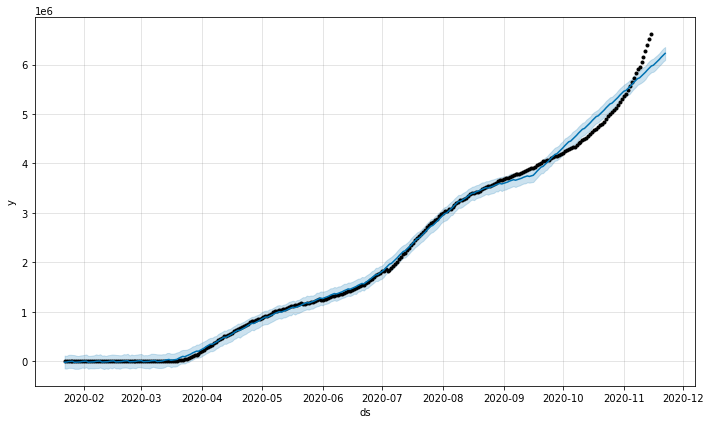

In [28]:
plot_no = m.plot(forecast)

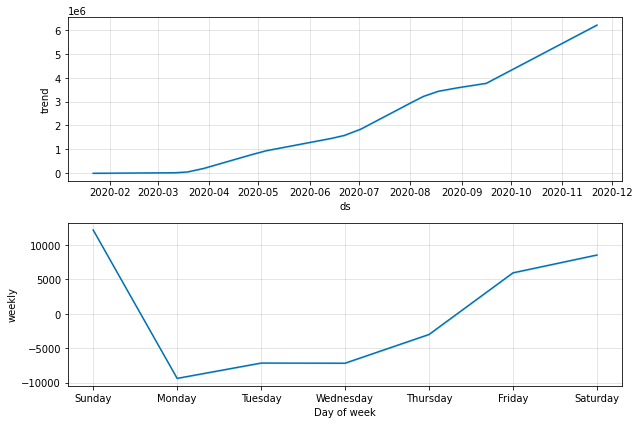

In [29]:
confirm_forecast_plot = m.plot_components(forecast)

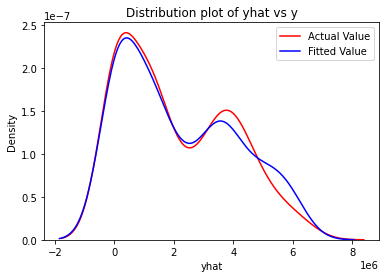

In [30]:
Yhat = forecast.yhat
ax1 = sns.distplot(df2['y'], hist= False, color= 'r', label= 'Actual Value')
sns.distplot(Yhat, hist= False, color= 'b', label= 'Fitted Value', ax= ax1)
plt.title(f"Distribution plot of yhat vs y")
plt.legend()
plt.show()

#Define Model


In [36]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt

In [37]:
def data_in_(country,province,df):
  #loading
  df_us = df[df['Country/Region']==country].drop(columns='SNo')
  df_us = df_us[df_us['Province/State']==province]
  df_us = df_us.groupby(['ObservationDate']).sum()
  df_us.reset_index(inplace=True)
  df_us = df_us.rename(columns = {'index':'ObservationDate'})

  #Active_case
  df_us['Active_case'] = df_us['Confirmed'] - df_us['Deaths'] - df_us['Recovered']

  #Daily_new_case
  cf = df_us.Confirmed.reset_index()
  cf=cf.drop(columns='index').values
  nc = [0]
  for i in range(1,len(df_us['Confirmed'])):
    a = cf[i]-cf[i-1]
    nc.append(int(a))
  df_us['Daily_new_case'] = nc

  #new_deaths
  d = df_us.Deaths.reset_index()
  d=d.drop(columns='index').values
  nd = [0]
  for i in range(1,len(df_us['Deaths'])):
    a = d[i]-d[i-1]
    nd.append(int(a))
  df_us['New_deaths'] = nd

  #new_recovered
  r = df_us.Recovered.reset_index()
  r = r.drop(columns='index').values
  nr = [0]
  for i in range(1,len(df_us['Deaths'])):
    a = r[i]-r[i-1]
    nr.append(int(a))
  df_us['New_recovered'] = nr
    
  return df_us

In [38]:
tokyo = data_in_('Japan','Hokkaido',df)
tokyo.head(5)

,ObservationDate,Confirmed,Deaths,Recovered,Active_case,Daily_new_case,New_deaths,New_recovered
0,05/28/2020,1070.0,86.0,763.0,221.0,0,0,0
1,05/29/2020,1073.0,86.0,770.0,217.0,3,0,7
2,05/30/2020,1077.0,86.0,783.0,208.0,4,0,13
3,05/31/2020,1082.0,86.0,799.0,197.0,5,0,16
4,06/01/2020,1087.0,87.0,810.0,190.0,5,1,11


In [39]:
from fbprophet import Prophet

def model_(df_us,feature):
  df2=df_us[['ObservationDate',feature]]
  df2.columns = ['ds','y']
  m = Prophet(interval_width=0.8)
  m.fit(df2)
  
  future = m.make_future_dataframe(periods=7)
  forecast = m.predict(future)

  plot_no = m.plot(forecast)
  plot_trend = m.plot_components(forecast)
  plt.show()
  
  Yhat = forecast.yhat
  ax1 = sns.distplot(df2['y'], hist= False, color= 'r', label= 'Actual Value')
  sns.distplot(Yhat, hist= False, color= 'b', label= 'Fitted Value', ax= ax1)
  plt.title(f"Distribution plot of yhat vs y")
  plt.legend()
  plt.show()

  from sklearn.metrics import r2_score
  print('R2_score: ',r2_score(df2.y,Yhat[0:-7]))
  return m

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


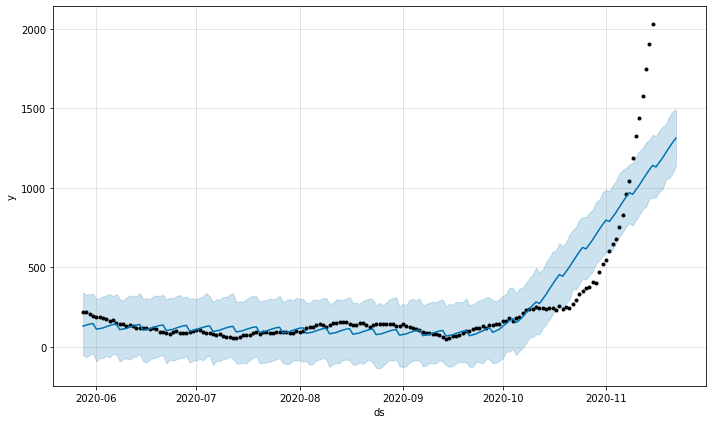

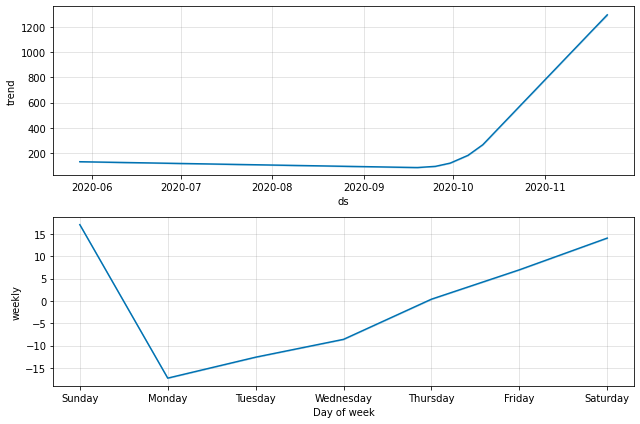

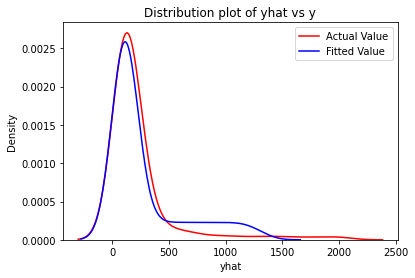

R2_score:  0.7898863435763678


In [40]:
m = model_(tokyo,'Active_case')

#Deploy model

##Save model

In [31]:
import pickle
pickle.dump(m, open('model.pkl','wb'))

##Load model

In [32]:
pickle.dump(m, open('model.pkl','wb'))

##Predict

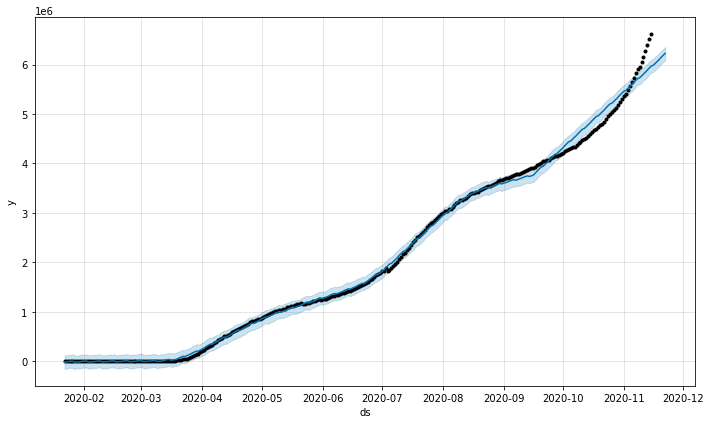

R2_score:  0.9967505848790879


In [33]:
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

plot_no = m.plot(forecast)
plt.show()

from sklearn.metrics import r2_score
print('R2_score: ',r2_score(df2.y,Yhat[0:-7]))

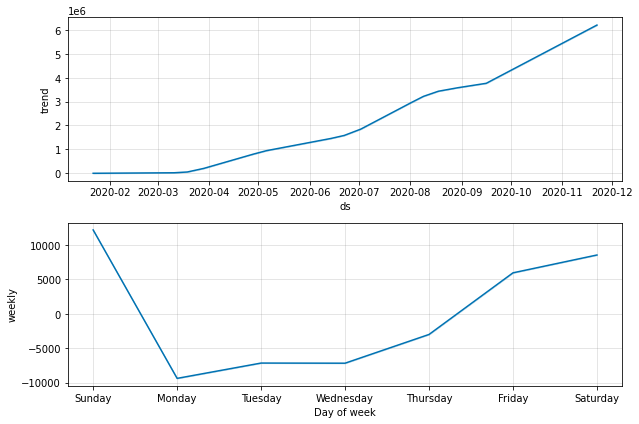

In [34]:
plot_trend = m.plot_components(forecast)
plt.show()

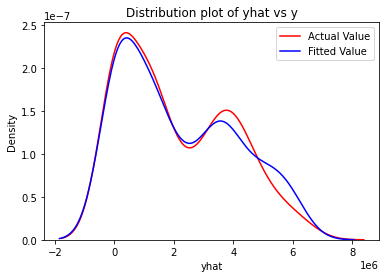

In [35]:
Yhat = forecast.yhat
ax1 = sns.distplot(df2['y'], hist= False, color= 'r', label= 'Actual Value')
sns.distplot(Yhat, hist= False, color= 'b', label= 'Fitted Value', ax= ax1)
plt.title(f"Distribution plot of yhat vs y")
plt.legend()
plt.show()